# Scatterplot of lap times across 2025 sessions

This is an exploration of lap times, and tire types, for pre-race sessions (practice and qualification) for the 2025
Miami Grand Prix.

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')

driver = 'VER'
race = 'Miami'
season = 2025

In [35]:
# Get FP1 data
fp1 = fastf1.get_session(season, race, 'FP1')
fp1.load()
fp1_laps = fp1.laps.pick_quicklaps().reset_index()

# Get sprint quali data
sq = fastf1.get_session(season, race, 'SQ')
sq.load()
sq_laps = sq.laps.pick_quicklaps().reset_index()

# Get sprint data
s = fastf1.get_session(season, race, 'S')
s.load()
s_laps = s.laps.reset_index()

# Get quali data
q = fastf1.get_session(season, race, 'Q')
q.load()
q_laps = q.laps.pick_quicklaps().reset_index()

# Get race data
r = fastf1.get_session(season, race, 'R')
r.load()
r_laps = r.laps.reset_index()


core           INFO 	Loading data for Miami Grand Prix - Practice 1 [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '5', '6', '7', '10', '12', '14', '16', '18', '22', '23', '27', '30', '31', '44', '55', '63', '81', '87']
core           INFO 	Loading data for Miami Grand Prix - Sprint Qualifying [v3.5.3]
req            INFO 	Using c

In [17]:
print(f"FP1: {fp1_laps['LapTime'].min()}   {fp1_laps['LapTime'].max()}")
print(f"SQ:  {sq_laps['LapTime'].min()}   {sq_laps['LapTime'].max()}")
print(f"Q:   {q_laps['LapTime'].min()}   {q_laps['LapTime'].max()}")

FP1: 0 days 00:01:27.128000   0 days 00:01:33.169000
SQ:  0 days 00:01:26.482000   0 days 00:01:29.901000
Q:   0 days 00:01:26.204000   0 days 00:01:29.167000


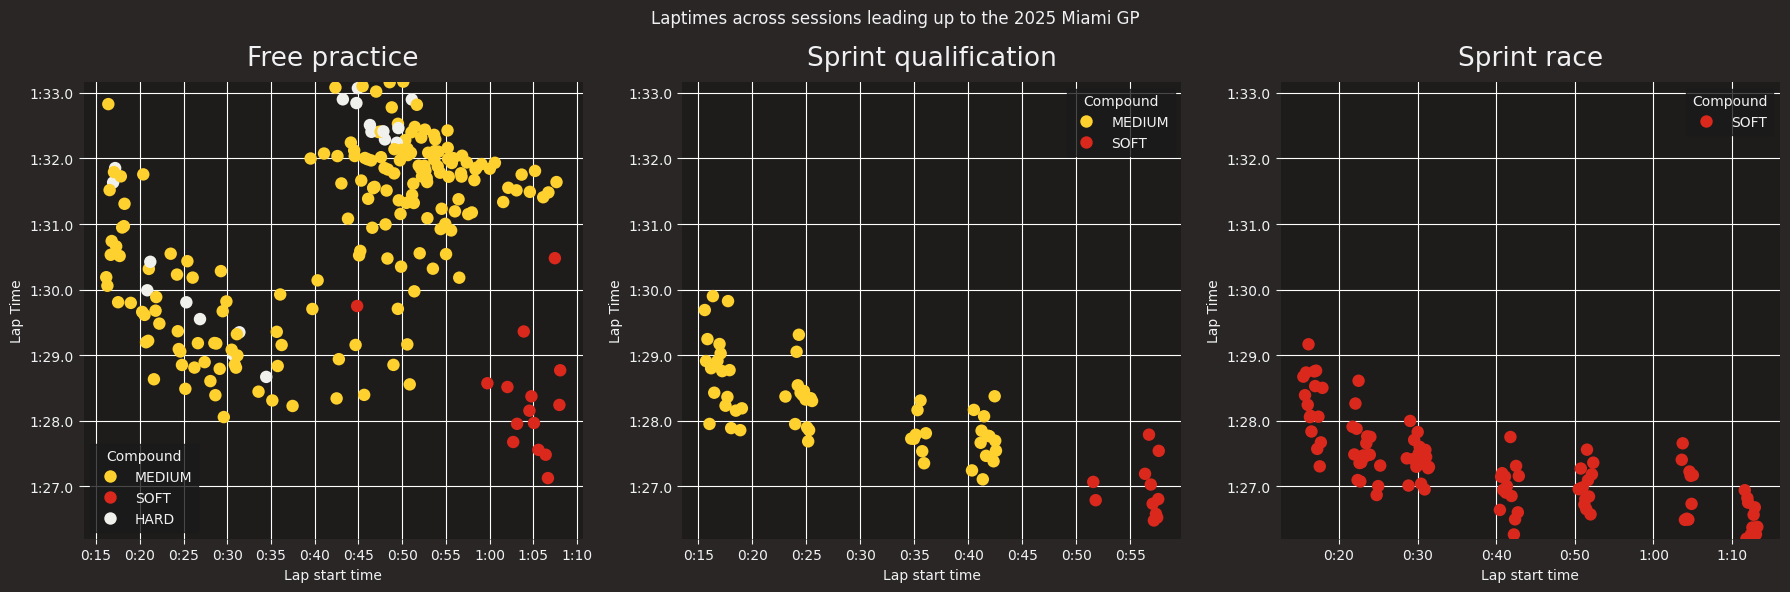

In [9]:
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 6))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Lap times in practice and qualification for 2025 Miami GP')

sns.scatterplot(data=fp1_laps,
                x="LapStartTime",
                y="LapTime",
                ax=ax1,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=fp1),
                s=80,
                linewidth=0,
                legend='auto'
)

sns.scatterplot(data=sq_laps,
                x="LapStartTime",
                y="LapTime",
                ax=ax2,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=sq),
                s=80,
                linewidth=0,
                legend='auto'
)

# sns.scatterplot(data=s_laps,
#                 x="LapStartTime",
#                 y="LapTime",
#                 ax=ax3,
#                 hue="Compound",
#                 palette=fastf1.plotting.get_compound_mapping(session=s),
#                 s=80,
#                 linewidth=0,
#                 legend='auto'
# )

sns.scatterplot(data=q_laps,
                x="LapStartTime",
                y="LapTime",
                ax=ax3,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=q),
                s=80,
                linewidth=0,
                legend='auto'
)

# Set common y-axis limits
common_ylim = (fp1_laps['LapTime'].max(), q_laps['LapTime'].min())
ax1.set_ylim(common_ylim)
ax2.set_ylim(common_ylim)
ax3.set_ylim(common_ylim)
#ax4.set_ylim(common_ylim)

ax1.set_title("Free practice")
ax1.set_xlabel("Lap start time")
ax1.set_ylabel("Lap Time")

ax2.set_title("Sprint qualification")
ax2.set_xlabel("Lap start time")
ax2.set_ylabel("Lap Time")

ax3.set_title("Sprint race")
ax3.set_xlabel("Lap start time")
ax3.set_ylabel("Lap Time")

# ax4.set_title("Qualification")
# ax4.set_xlabel("Lap start time")
# ax4.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()
#ax4.invert_yaxis()

plt.suptitle("Laptimes across sessions leading up to the 2025 Miami GP")

# Turn on major grid lines
ax1.grid(color='w', which='major', axis='both')
ax2.grid(color='w', which='major', axis='both')
ax3.grid(color='w', which='major', axis='both')
#ax4.grid(color='w', which='major', axis='both')

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

In [32]:
print(f"S:   {s_laps['LapTime'].min()}   {s_laps['LapTime'].max()}")
print(f"R:   {r_laps['LapTime'].min()}   {r_laps['LapTime'].max()}")

S:   0 days 00:01:36.368000   0 days 00:02:29.846000
R:   0 days 00:01:29.746000   0 days 00:01:36.020000


In [30]:
r_laps.columns

Index(['index', 'Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber',
       'Stint', 'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time',
       'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime',
       'Sector3SessionTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST',
       'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre', 'Team',
       'LapStartTime', 'LapStartDate', 'TrackStatus', 'Position', 'Deleted',
       'DeletedReason', 'FastF1Generated', 'IsAccurate'],
      dtype='object')

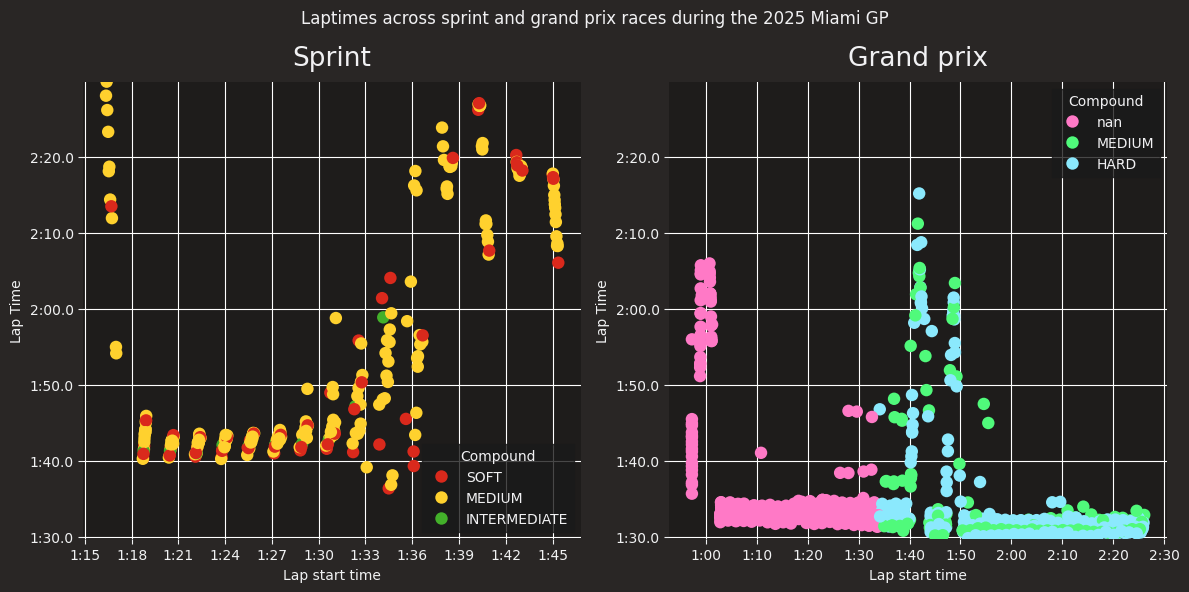

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(data=s_laps,
                x="LapStartTime",
                y="LapTime",
                ax=ax1,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=s),
                s=80,
                linewidth=0,
                legend='auto'
)

sns.scatterplot(data=r_laps,
                x="LapStartTime",
                y="LapTime",
                ax=ax2,
                hue="Compound",
                # palette=fastf1.plotting.get_compound_mapping(session=r),
                s=80,
                linewidth=0,
                legend='auto'
)

common_ylim = (s_laps['LapTime'].max(), r_laps['LapTime'].min())
ax1.set_ylim(common_ylim)
ax2.set_ylim(common_ylim)

ax1.set_title("Sprint")
ax1.set_xlabel("Lap start time")
ax1.set_ylabel("Lap Time")

ax2.set_title("Grand prix")
ax2.set_xlabel("Lap start time")
ax2.set_ylabel("Lap Time")

ax1.invert_yaxis()
ax2.invert_yaxis()

# Turn on major grid lines
ax1.grid(color='w', which='major', axis='both')
ax2.grid(color='w', which='major', axis='both')

sns.despine(left=True, bottom=True)

plt.suptitle("Laptimes across sprint and grand prix races during the 2025 Miami GP")
plt.tight_layout()
plt.show()


---

This is the end of the notebook.